In [2]:
import sys
#sys.path.append("D:\Julian\workspace\endolas")
sys.path.append("/home/julian/Documents/Studium/MT-Masterarbeit/Workspace/endolas")

import numpy as np
import matplotlib.pyplot as plt
from endolas import utils
import os
import importlib

import pandas as pd
import seaborn as sns

In [141]:
evaluation_csv = os.path.abspath('pipeline_evaluation_csv.csv')
data = pd.read_csv(evaluation_csv)

# Detection

Stacked barplot

In [62]:
d = {'Method' : ['Deep Learning', 'Conventional'],
     'Correct' : [data['Correct'].mean(), 0.6095],
     'Not' : [data['Not'].mean(), 0.3285], 
     'Wrong' : [data['Wrong'].mean(), 0.0620]}
df = pd.DataFrame(data=d)*100

In [87]:
df

,Method,Correct,Not,Wrong
0,Deep LearningDeep LearningDeep LearningDeep Le...,98.672154,0.990907,0.336938
1,ConventionalConventionalConventionalConvention...,60.950000,32.850000,6.200000


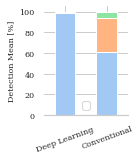

In [86]:
plt.rcParams['figure.figsize'] = 1.5,2.
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.set_style({'font.family':'serif',})
ax = df.plot(kind='bar', stacked=True)
sns.despine(left=True)
ax.set_ylabel("Detection Mean [%]",fontsize=8)
ax.set_xticklabels(['Deep Learning', 'Conventional'], rotation=20)
ax.tick_params(labelsize=8)
plt.legend("")
plt.savefig("bars_8_9.svg")

Violin plot

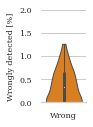

In [38]:
COLOR_POSTERIOR = '#4cb2cf'
COLOR_ANTERIOR = '#87bf4b'
COLOR_TRUE = '#f78002'

plt.rcParams['figure.figsize'] = 0.8,1.7

sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Load the example tips dataset
tips = sns.load_dataset("tips")

sns.set_style({'font.family':'serif',})

# Draw a nested violinplot and split the violins for easier comparison
ax=sns.violinplot(#hue="Set",
               split=True, cut=0,# bw=1,
               #palette={"val": '#e5e5e5ff', "test": "r"},
               color=COLOR_TRUE,
               data=data.iloc[:,4:5]*100,
               inner='box',
               linewidth=1,
               scale='width')


ax.set_ylabel("Wrongly detected [%]",fontsize=8)
ax.tick_params(labelsize=8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

ax.set(ylim=(0, 2))
plt.xlabel("")
sns.despine(left=True)

plt.savefig("wrong_8_9.svg")

# Matching

Scatter

In [142]:
data = data.rename(columns={"Specificity": "Specificity [%]", 
                     "Sensitivity": "Sensitivity [%]",
                     "Accuracy": "Accuracy [%]"})

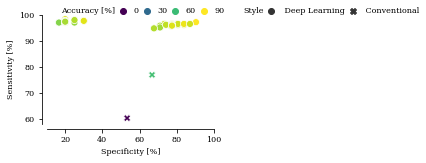

In [115]:
sns.set_style({'font.family':'serif',})
plt.rcParams['figure.figsize'] = 3,2
ax = sns.scatterplot(x=data['Specificity [%]']*100,
                     y=data['Sensitivity [%]']*100,
                     hue=data['Accuracy [%]']*100,
                     s=50,
                     style=data['Style'],
                     palette='viridis')
ax.set(ylim=(58, 100))
ax.set(xlim=(10, 100))
plt.gca().spines['left'].set_position(('outward', 5))
plt.gca().spines['bottom'].set_position(('outward', 5))

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.legend(loc=(0.0, 1.0), ncol=10, frameon=False, borderpad=0.0, labelspacing=0.2, handlelength=1.0, columnspacing=0.5, fontsize= 8)


ax.tick_params(labelsize=8)
ax.xaxis.label.set_size(8)
ax.yaxis.label.set_size(8)
plt.savefig("matching_8_9.svg")

Distribution

In [143]:
data = data[data.Style!=' Conventional']

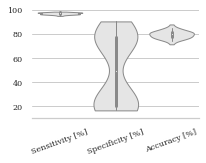

In [147]:
COLOR_POSTERIOR = '#4cb2cf'
COLOR_ANTERIOR = '#87bf4b'
COLOR_TRUE = '#f78002'

plt.rcParams['figure.figsize'] = 3,2

sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Load the example tips dataset
tips = sns.load_dataset("tips")

sns.set_style({'font.family':'serif',})

# Draw a nested violinplot and split the violins for easier comparison
ax=sns.violinplot(#hue="Set",
               split=True, cut=0,# bw=1,
               #palette={"val": '#e5e5e5ff', "test": "r"},
               color='#e5e5e5ff',
               data=data.iloc[:,5:8]*100,
               inner='box',
               linewidth=1,
               scale='width')


#ax.set_ylabel("Wrongly detected [%]",fontsize=8)
ax.tick_params(labelsize=8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20)

ax.set(ylim=(10, 100))
plt.xlabel("")
sns.despine(left=True)
plt.savefig("matching_8_9_violin.svg")

In [146]:
plt.savefig("matching_8_9_violin.svg")

<Figure size 216x144 with 0 Axes>

# Time for labeling

In [9]:
evaluation_csv = os.path.abspath('pipeline_time.csv')
data = pd.read_csv(evaluation_csv)

In [72]:
data[data.Software=='Videoclick'].Tracking.mean()

2076.0

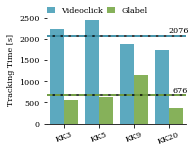

In [75]:
COLOR_POSTERIOR = '#4cb2cf'
COLOR_ANTERIOR = '#87bf4b'

plt.rcParams['figure.figsize'] = 2.5,2
sns.set_style({'font.family':'serif',})
ax = sns.barplot(x=data.Dataset, y=data.Tracking, hue=data.Software, palette={'Videoclick':COLOR_POSTERIOR,
                                                                               'Glabel':COLOR_ANTERIOR})
ax.set_ylabel("Tracking Time [s]",fontsize=8)
ax.tick_params(labelsize=8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20)

#ax.set(ylim=(0, 2))
plt.xlabel("")
sns.despine(left=True)
plt.legend(loc=(0.0, 1.0), ncol=2, frameon=False, borderpad=0.0, labelspacing=0.2, handlelength=1.0, columnspacing=0.5, fontsize= 8)
ax.axhline(2076, ls='-', c='k')
ax.axhline(2076, ls='--', c=COLOR_POSTERIOR)
ax.text(3.,2140, "2076", fontsize=8)
ax.axhline(676, ls='-', c='k')
ax.axhline(676, ls='--', c=COLOR_ANTERIOR)
ax.text(3.1,740, "676", fontsize=8)

plt.savefig("tracking.svg")